In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import os
import cv2
from tensorflow.keras import layers,models
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
Datadir = "Dataset"
Classes = ["mask_weared_incorrect","with_mask","without_mask"]
Dataset=[]

def data_preprocessing():
    for file in Classes:
        path = os.path.join(Datadir,file) #create path of two files
        class_num = Classes.index(file) #classification parameter
        for img in tqdm(os.listdir(path)): #iterate overall img in the file 
            try:
                img_arr = cv2.imread(os.path.join(path,img)) #read the img
                img_arr = cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB) #it may be not necessory but i put it as a precaution
                img_arr = cv2.resize(img_arr, (96, 96)) # resize the img
                img_arr = np.array(img_arr) #convert to numpay array
                Dataset.append([img_arr, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
data_preprocessing()

100%|████████████████████████████████████████████████████████████████████████████| 2994/2994 [00:02<00:00, 1157.32it/s]


In [3]:
Features = []
Target = []

for feature,label in Dataset:
    Target.append(label)
    Features.append(feature)  

Features = np.array(Features)
print("Features loaded..\n")


Features loaded..



In [4]:
Xtrain, Xtest, ytrain, ytest = train_test_split(Features,Target,test_size=.25,random_state=1234123)

Xtrain = np.array(Xtrain)
Xtest = np.array(Xtest)
ytrain = np.array(ytrain)
ytest = np.array(ytest)

In [5]:
print("Start training..\n")

model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3),activation='relu', input_shape=(96,96,3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(32, (3, 3),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(128, (3, 3),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(256, (3, 3),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
#--------------------------------------------

model.add(layers.Flatten())  # this converts our 3D feature(width,height,channel) maps to 1D feature vectors

model.add(layers.Dense(256,activation='relu'))#feature selection

model.add(layers.Dense(3))

model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])#combination between two GD methodologies "adam"
history = model.fit(Xtrain, ytrain,epochs=10, validation_data=(Xtest, ytest))
test_loss, test_acc = model.evaluate(Xtest,  ytest, verbose=2)
print("accuracy ",test_acc)

Start training..

Epoch 1/10
211/211 [==============================] - 34s 160ms/step - loss: 0.6168 - accuracy: 0.8146 - val_loss: 0.2398 - val_accuracy: 0.9274
Epoch 2/10
211/211 [==============================] - 35s 164ms/step - loss: 0.1704 - accuracy: 0.9473 - val_loss: 0.1554 - val_accuracy: 0.9577
Epoch 3/10
211/211 [==============================] - 35s 167ms/step - loss: 0.1265 - accuracy: 0.9618 - val_loss: 0.0922 - val_accuracy: 0.9697
Epoch 4/10
211/211 [==============================] - 34s 161ms/step - loss: 0.1019 - accuracy: 0.9684 - val_loss: 0.0769 - val_accuracy: 0.9760
Epoch 5/10
211/211 [==============================] - 33s 155ms/step - loss: 0.0804 - accuracy: 0.9739 - val_loss: 0.0888 - val_accuracy: 0.9795
Epoch 6/10
211/211 [==============================] - 33s 157ms/step - loss: 0.0674 - accuracy: 0.9794 - val_loss: 0.1129 - val_accuracy: 0.9622
Epoch 7/10
211/211 [==============================] - 35s 167ms/step - loss: 0.0577 - accuracy: 0.9807 - val_los

In [6]:
model.save("Face mask Detection.model")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: Face mask Detection.model\assets


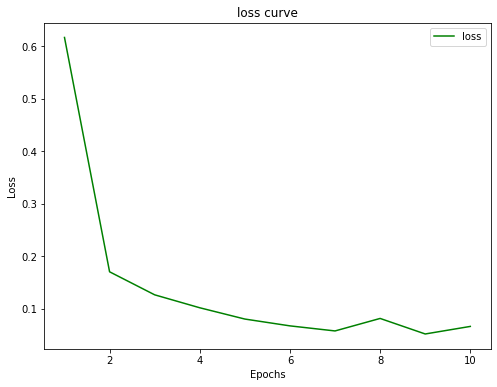

In [7]:
#loss curve
loss_train = history.history['loss']
epochs = range(1,11)
plt.figure(figsize=(8,6))
plt.plot(epochs, loss_train, 'g', label='loss')
plt.title('loss curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

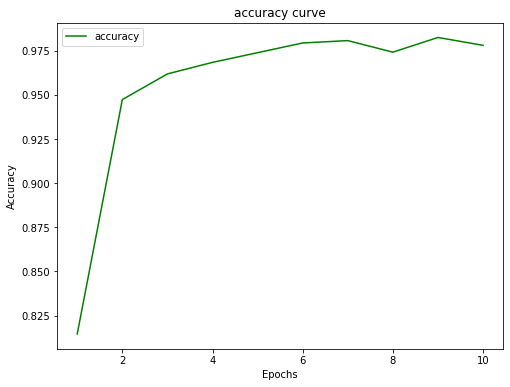

In [8]:
#accuracy curve
loss_train = history.history['accuracy']
epochs = range(1,11)
plt.figure(figsize=(8,6))
plt.plot(epochs, loss_train, 'g', label='accuracy')
plt.title('accuracy curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


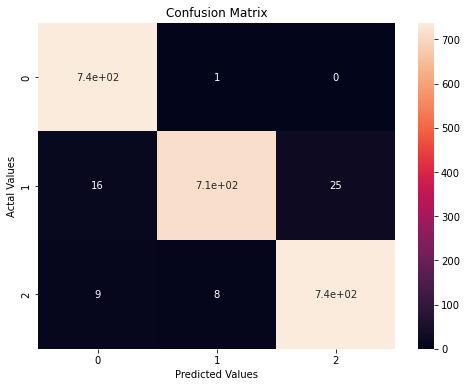

In [9]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

prediction = model.predict(Xtest).argmax(axis=1)
cm = confusion_matrix(ytest, prediction)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()